In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from scipy import signal
import scipy.io.wavfile as wf
from scipy.interpolate import interp1d
import os

plt.rcParams['figure.figsize'] = [16, 8] 

plt.rcParams['axes.titlesize'] = 24      # Title font size
plt.rcParams['axes.labelsize'] = 20      # Axis label font size
plt.rcParams['xtick.labelsize'] = 16     # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 16     # Y-axis tick label font size       
plt.rcParams['xtick.major.width'] = 2    # Major tick width on X-axis
plt.rcParams['ytick.major.width'] = 2    # Major tick width on Y-axis

In [74]:
path = os.path.expanduser('~/hslu/paind/paper/images/')
alpha = 0.5

# Perfect Reconstruction OLA

/tmp/ipykernel_7816/2054646671.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_o, data_o = wf.read("../data/dup.wav")


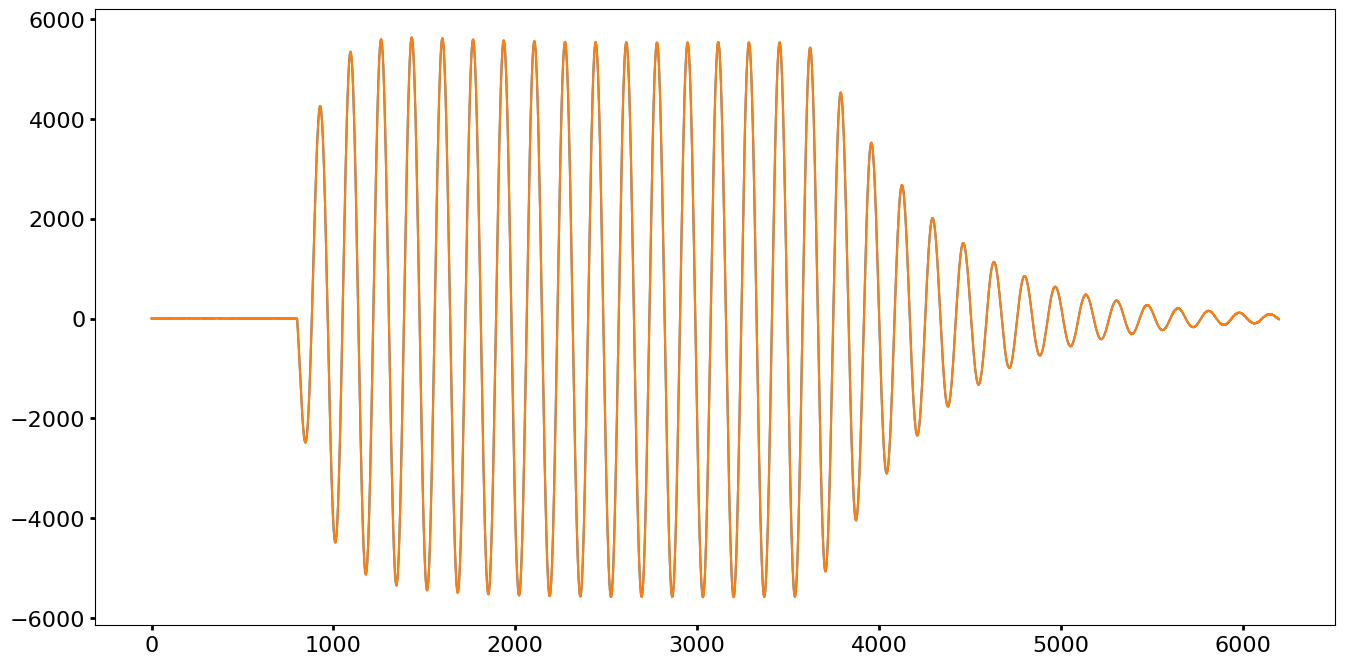

In [75]:
fs_r, data_r = wf.read("../data/re.wav")
fs_o, data_o = wf.read("../data/dup.wav")

data_o = data_o[:, 0]

x = np.arange(0, data_r.shape[0])
plt.plot(x[0:6200], data_r[0:6200])
plt.plot(x[0:6200], data_o[0:6200])
plt.show()


# Perfect Reconstruction Phase Vocoder

/tmp/ipykernel_7816/394868396.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_o, data_o = wf.read("../data/dup.wav")


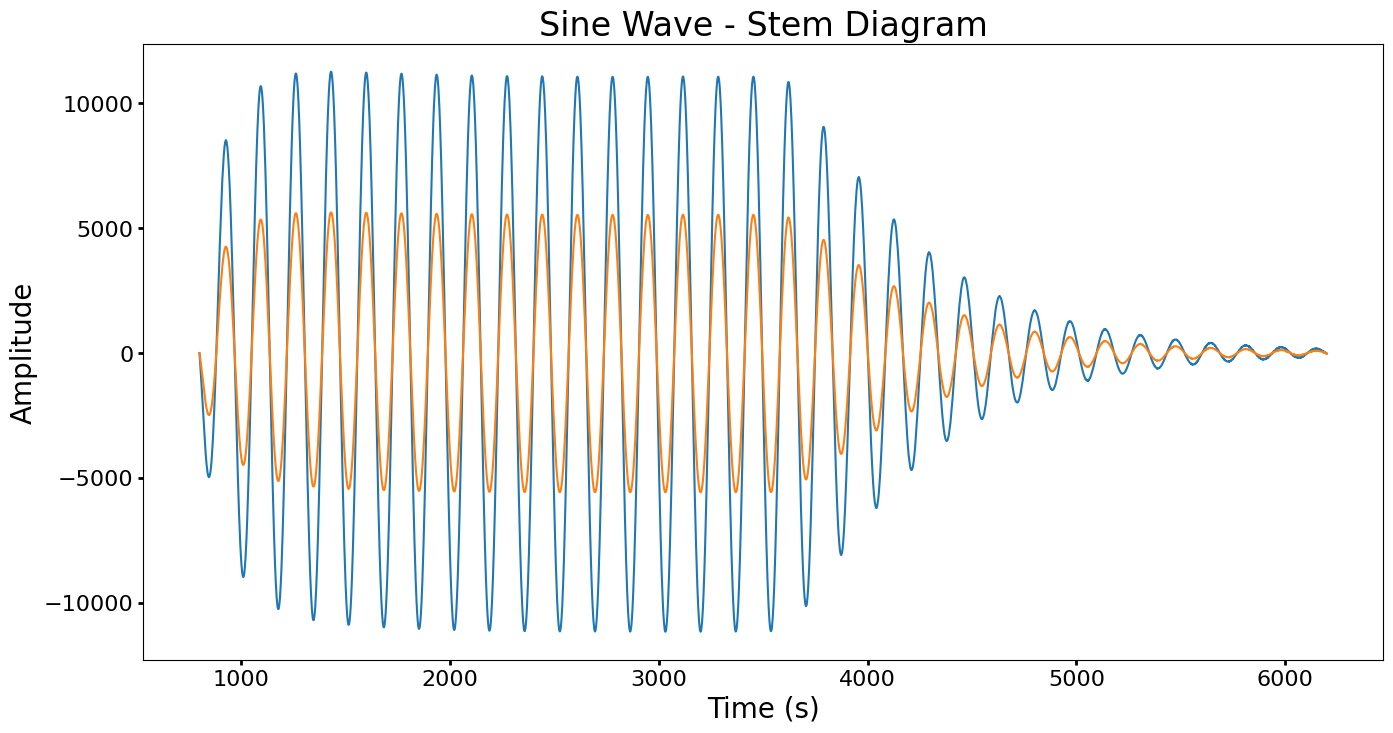

In [76]:
fs_r, data_r = wf.read("../data/re2.wav")
fs_o, data_o = wf.read("../data/dup.wav")

data_o = data_o[:, 0]

x = np.arange(0, data_r.shape[0])

plt.figure(figsize=(16, 8))
plt.title('Sine Wave - Stem Diagram')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(x[800:6200], data_r[800:6200])
plt.plot(x[800:6200], data_o[800:6200])
plt.show()


# Interpolation

In [77]:
# Parameters
frequency = 440
sampling_rate = 40000
num_periods = 2
duration_per_period = 1 / frequency 
duration = num_periods * duration_per_period
num_samples = 50  

## Normal

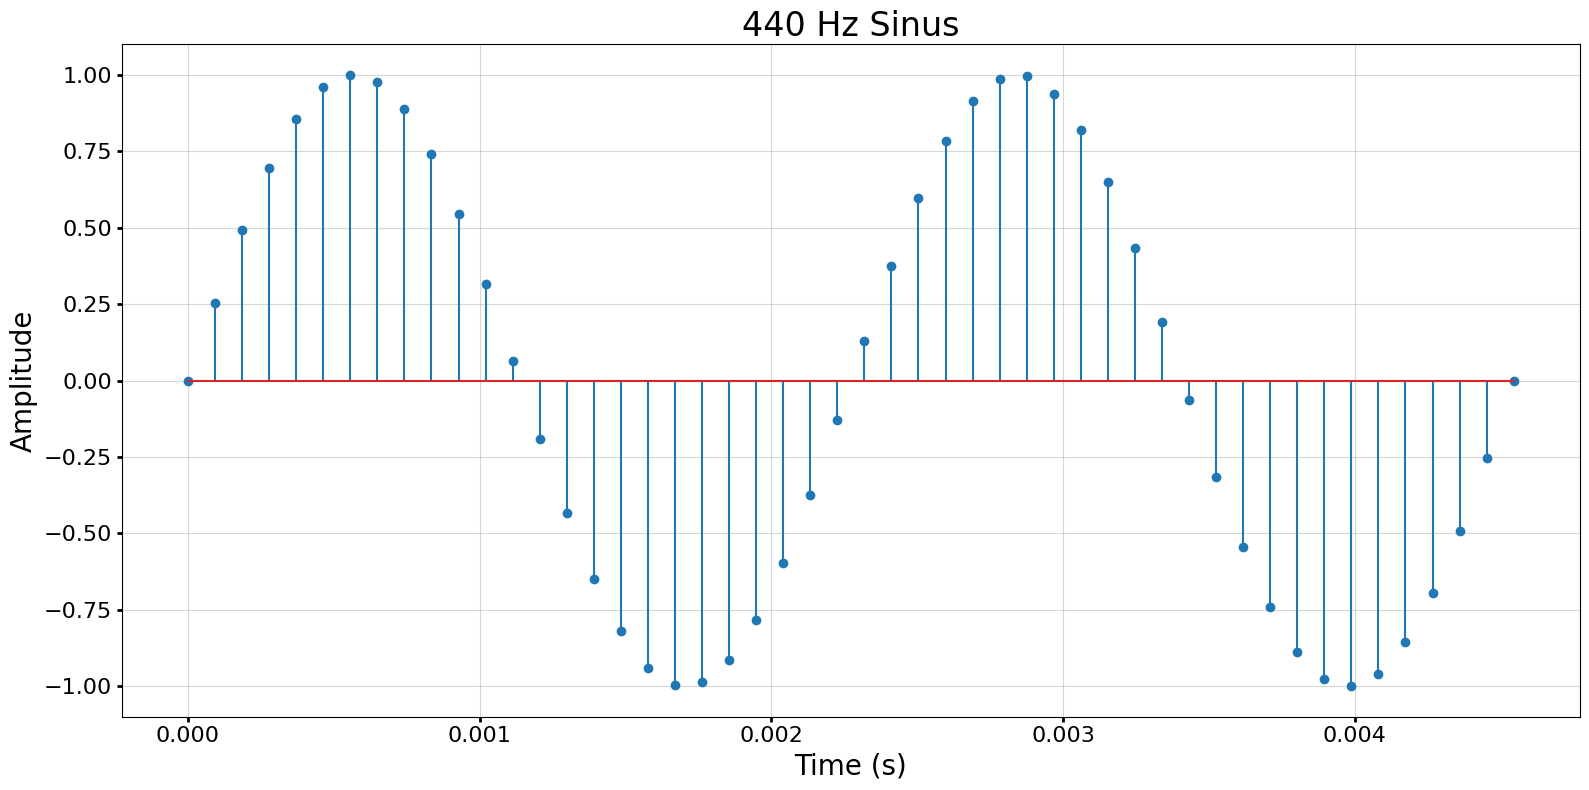

In [78]:
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)

title = '440 Hz Sinus'
# Plot the stem diagram
plt.subplot()
plt.stem(t, sine_wave)
plt.title(title)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()


## Zero Padding

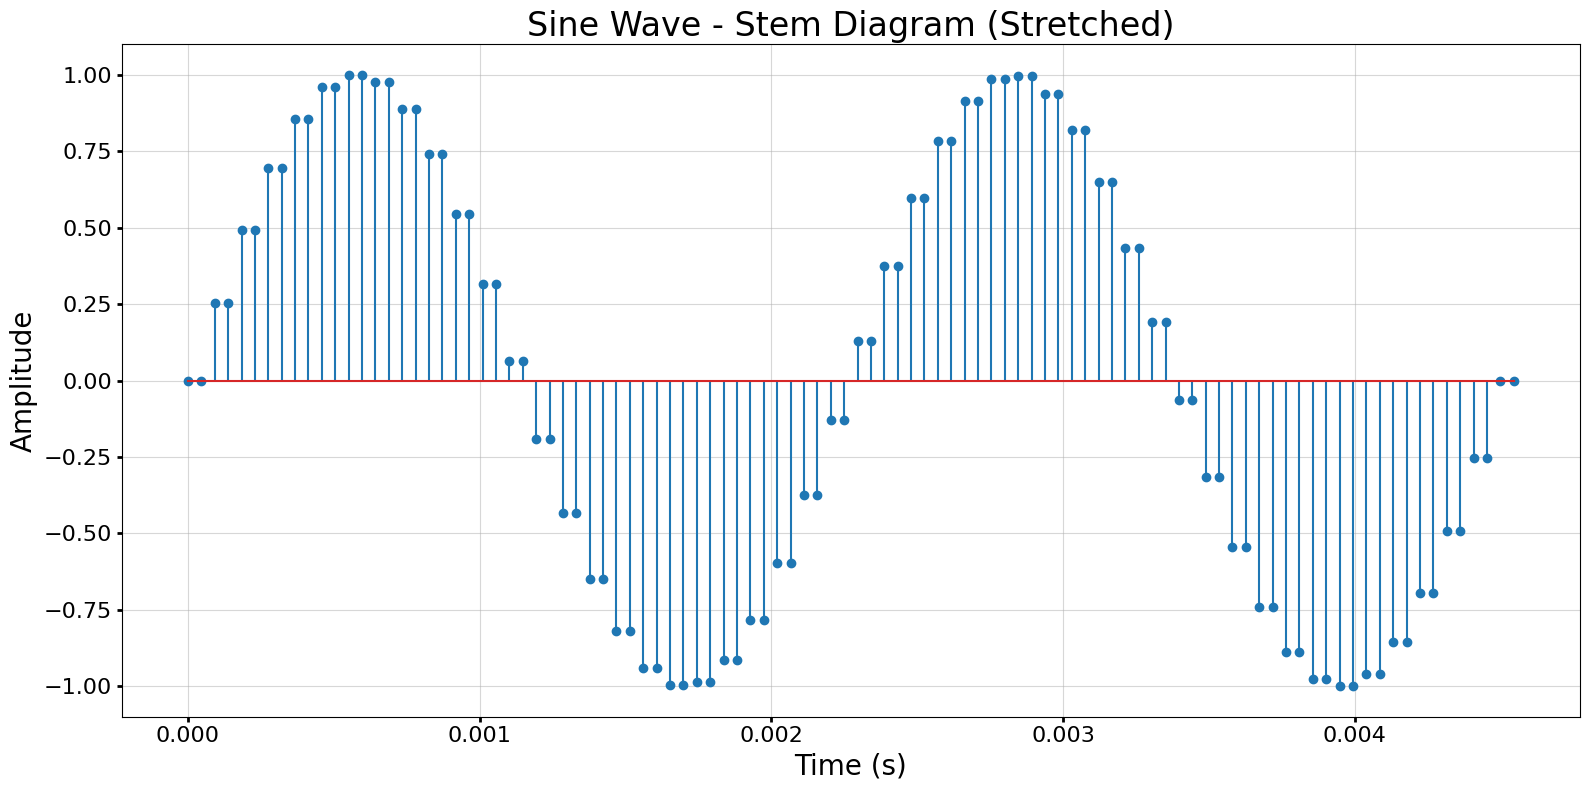

In [79]:
import numpy as np
import matplotlib.pyplot as plt


# Generate original time array
t_original = np.linspace(0, duration, num_samples)
sine_wave_original = np.sin(2 * np.pi * frequency * t_original)

# Stretching the signal by doubling each sample
sine_wave_stretched = np.repeat(sine_wave_original, 2)

# Generate stretched time array
t_stretched = np.linspace(0, duration, len(sine_wave_stretched))
title = 'sine_wave_stretched'
plt.subplot()
plt.stem(t_stretched, sine_wave_stretched)
plt.title('Sine Wave - Stem Diagram (Stretched)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png' , dpi=300, bbox_inches='tight', transparent=True)
plt.show()




## Upsampling zero Padding

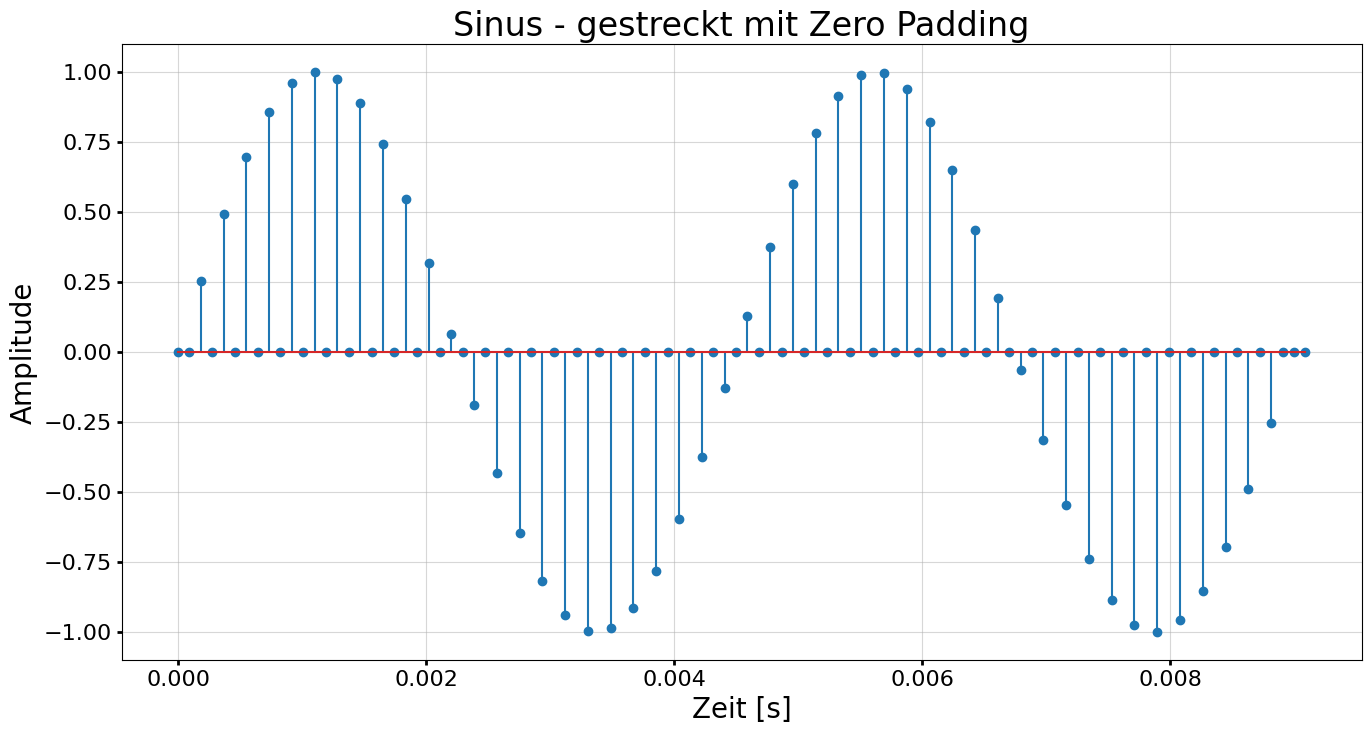

In [80]:
# Generate sine wave
sine_wave_original = np.sin(2 * np.pi * frequency * t)

# Stretching the signal by zero-padding
sine_wave_stretched = np.zeros(2 * num_samples)
sine_wave_stretched[::2] = sine_wave_original

# Generate stretched time array
t_stretched = np.linspace(0, 2*duration, len(sine_wave_stretched))

title = 'Sinus - gestreckt mit Zero Padding'

plt.subplot()
plt.stem(t_stretched, sine_wave_stretched)
plt.title(title)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()


## Upsampling Interpolation

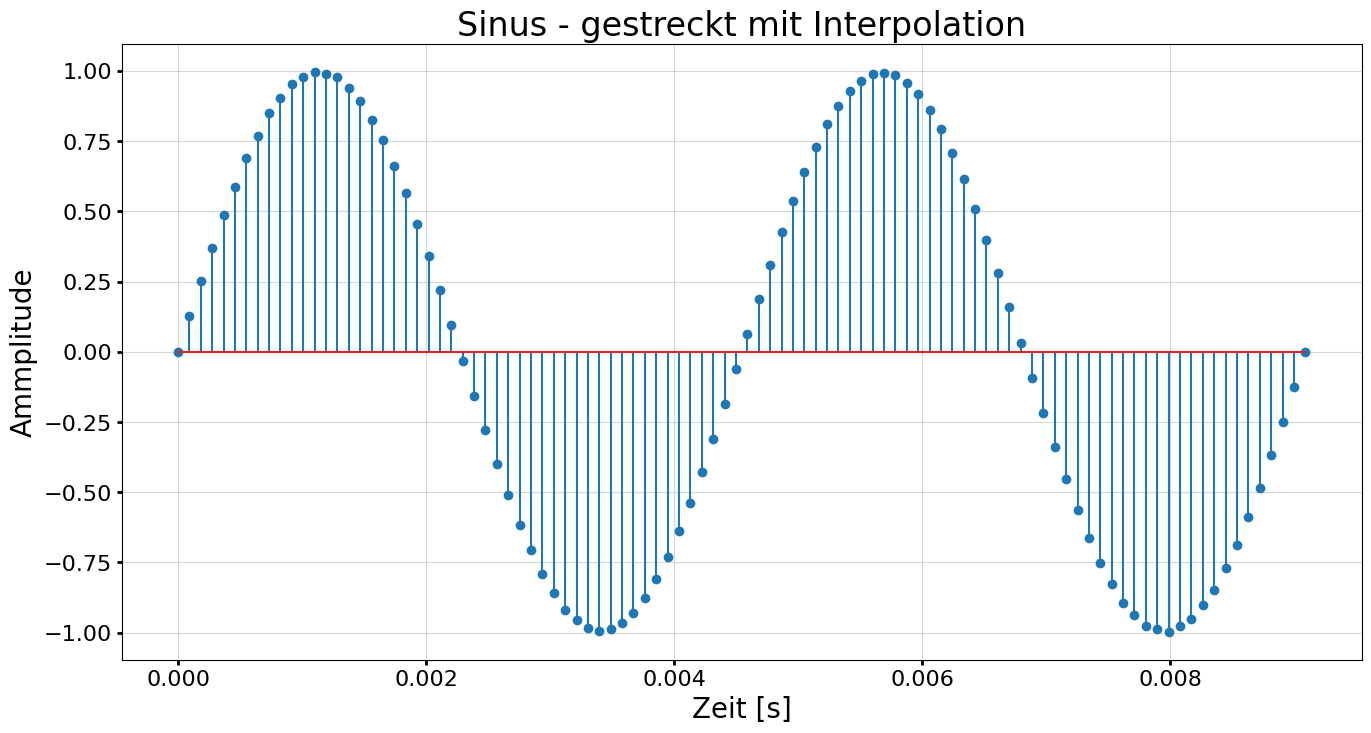

In [81]:

sine_wave_original = np.sin(2 * np.pi * frequency * t)

# Interpolate to double the length of the sine wave
interp_factor = 2  # Stretching factor
interpolator = interp1d(t, sine_wave_original, kind='linear')

# New time array for the stretched signal
t_stretched = np.linspace(0, duration * interp_factor, num_samples * interp_factor)

# Perform the interpolation
sine_wave_stretched = interpolator(np.linspace(0, duration, num_samples * interp_factor))



title = 'Sinus - gestreckt mit Interpolation'
plt.subplot()
plt.stem(t_stretched, sine_wave_stretched)
plt.title(title)
plt.xlabel('Zeit [s]')
plt.ylabel('Ammplitude')
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()



## Decimation

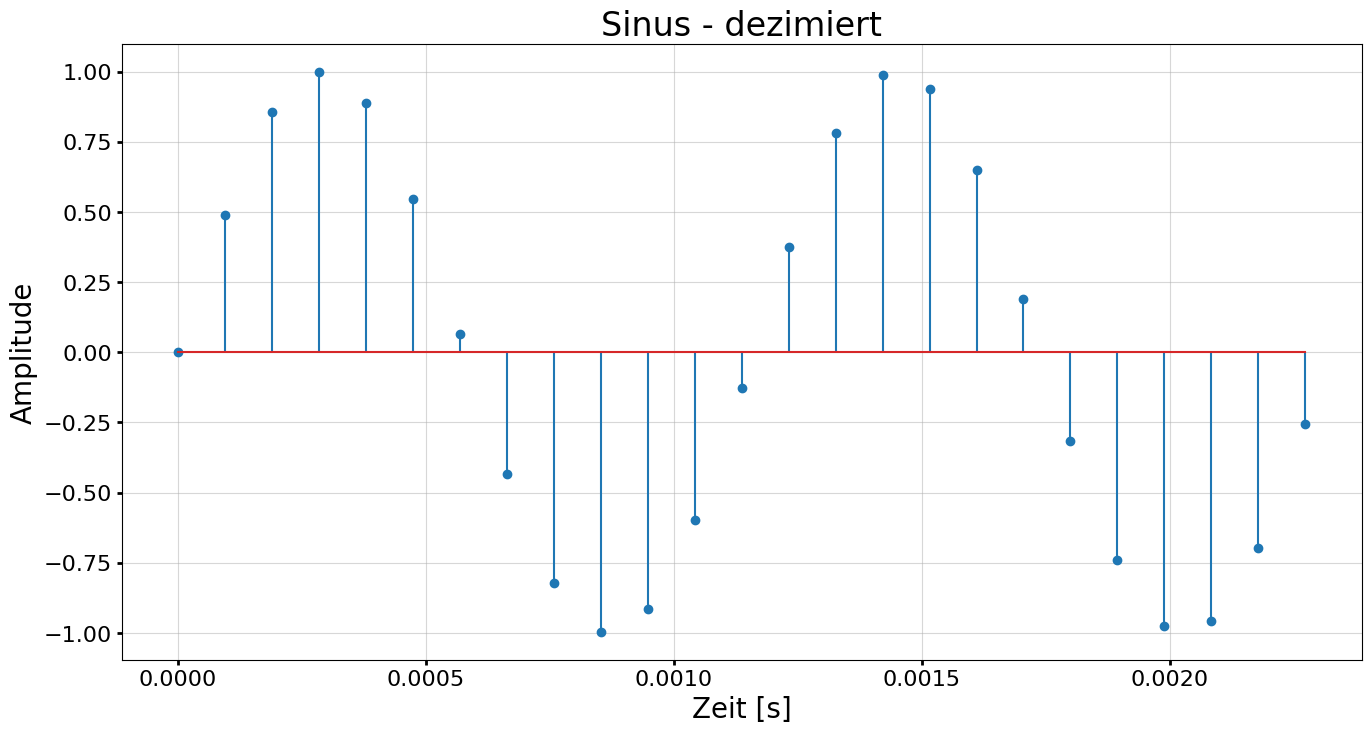

In [82]:
sine_wave_original = np.sin(2 * np.pi * frequency * t)
sine_wave_decimated = sine_wave_original[::2] 
t_decimated = np.linspace(0, duration/2, int(num_samples / 2))

title = 'Sinus - dezimiert'
plt.subplot()
plt.stem(t_decimated, sine_wave_decimated)
plt.title(title)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Frames 

In [83]:
num_samples = 1000
duration = 1/34

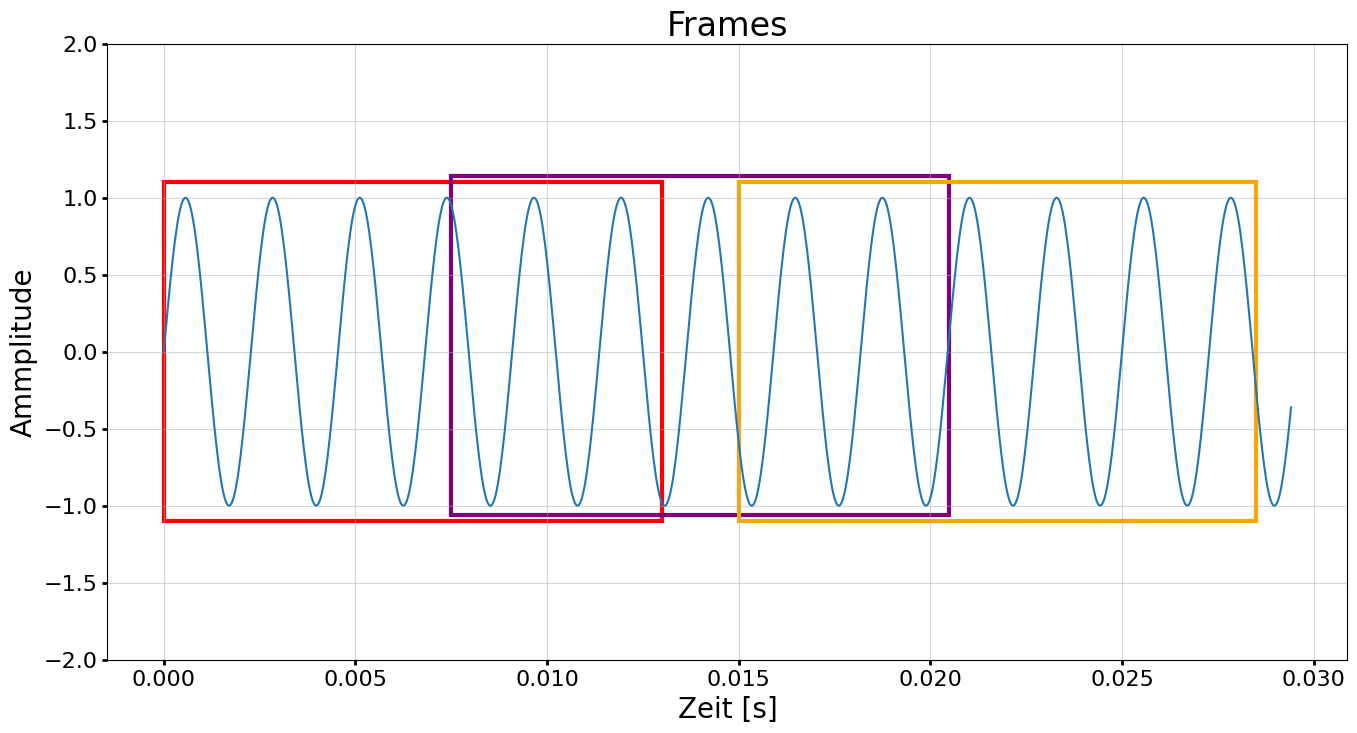

In [84]:
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)

title = 'Frames'
plt.subplot()
plt.plot(t, sine_wave)
plt.title(title)
plt.ylim(-2, 2)
plt.xlabel('Zeit [s]')
plt.ylabel('Ammplitude')

# Define the ranges and top/bottom ends for colored frames
frame_ranges = [(0, 0.013, 1.1, -1.1), (0.0075, 0.0205, 1.14, -1.06), (0.015, 0.0285, 1.1, -1.1)]  # (start, end, top, bottom)

colors = ['red', 'purple', 'orange']
i = 0
# Add colored outlines around specified areas
for frame_range in frame_ranges:
    
    x_start, x_end, top, bottom = frame_range
    rect = Rectangle((x_start, bottom), x_end - x_start, top - bottom, linewidth=3, edgecolor=colors[i], fill=False)
    plt.gca().add_patch(rect)
    i = i + 1

plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Synthese

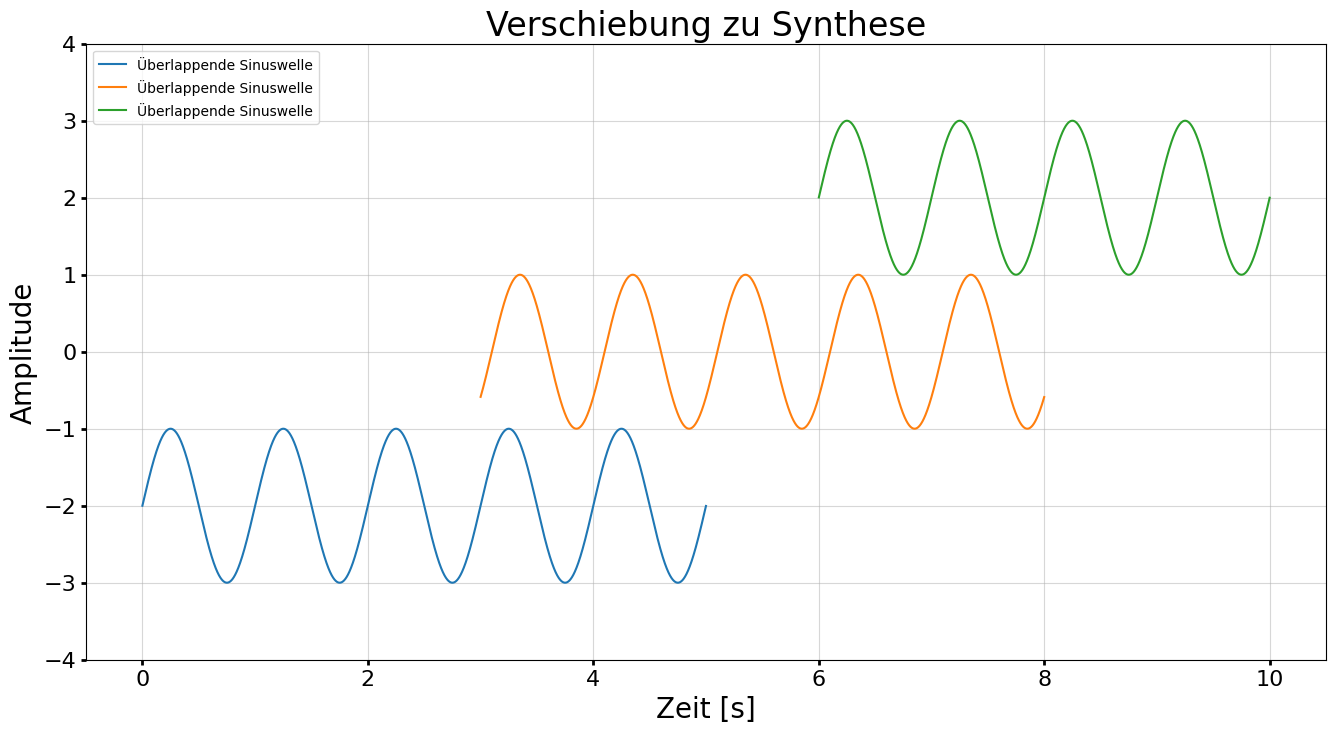

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Definieren der Parameter
num_samples = 10000
duration = 10
frequency = 1  # Beispiel-Frequenz (kann geändert werden)
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)
sine1 = sine_wave[0:5000]
sine2 = sine_wave[2900:7900]
sine3 = sine_wave[6000:10000]

# window each sine wave with a hanning window from

# Plotten der überlappenden Sinuswelle
title = 'Verschiebung zu Synthese'
plt.plot(t[0:5000], sine1-2, label='Überlappende Sinuswelle')
plt.plot(t[3000:8000], sine2, label='Überlappende Sinuswelle') 
plt.plot(t[6000:10000], sine3+2, label='Überlappende Sinuswelle')
plt.title(title)
plt.ylim(-4, 4)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()


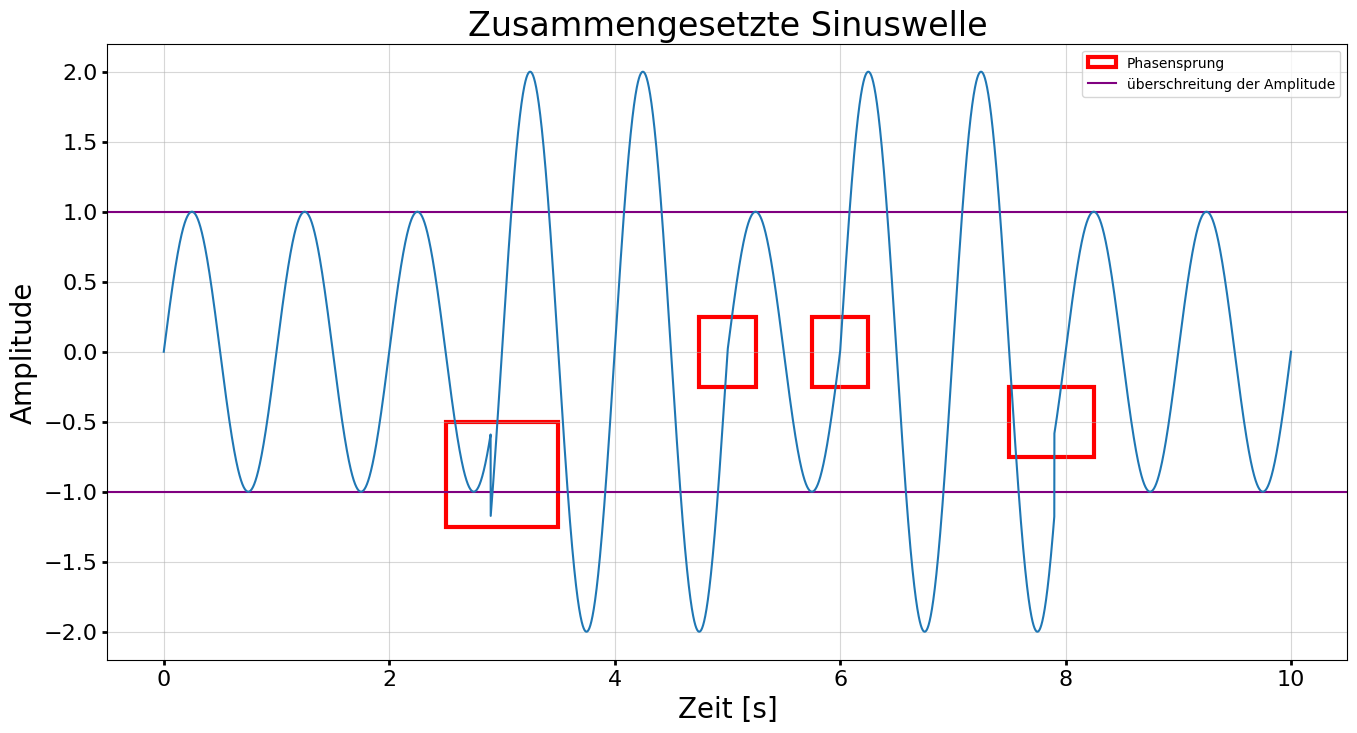

In [86]:
# Definieren der Parameter
num_samples = 10000
duration = 10
frequency = 1  # Beispiel-Frequenz (kann geändert werden)
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)
sine1 = sine_wave[0:5000]
sine2 = sine_wave[2900:7900]
sine3 = sine_wave[6000:10000]

# Initialisieren des zusammengesetzten Signals
composite_wave = np.zeros(num_samples)

# Addieren der Sinuswellen in ihre entsprechenden Bereiche
composite_wave[:5000] += sine1
composite_wave[2900:7900] += sine2
composite_wave[6000:10000] += sine3

# Define the ranges and top/bottom ends for colored frames
frame_ranges = [(2.5, 3.5, -.5, -1.25),(4.75, 5.25, .25, -.25), (7.5, 8.25, -.25, -.75), (5.75, 6.25, .25, -.25),]  # (start, end, top, bottom)

colors = ['red', 'purple', 'orange']
i = 0
# Add colored outlines around specified areas
for frame_range in frame_ranges:
    
    x_start, x_end, top, bottom = frame_range
    rect = Rectangle((x_start, bottom), x_end - x_start, top - bottom, linewidth=3, color='red', fill=False,)
    if i == 0:
        rect = Rectangle((x_start, bottom), x_end - x_start, top - bottom, linewidth=3, color='red', fill=False, label='Phasensprung')
    plt.gca().add_patch(rect)


    i = i + 1

# Plot horizontal line at y=1 and y=-1
plt.axhline(y=-1, color='purple',label='überschreitung der Amplitude')
plt.axhline(y=1, color='purple')
title = 'Probleme bei Synthese'
# Plotten des zusammengesetzten Signals
plt.plot(t, composite_wave)
plt.title('Zusammengesetzte Sinuswelle')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Windowing

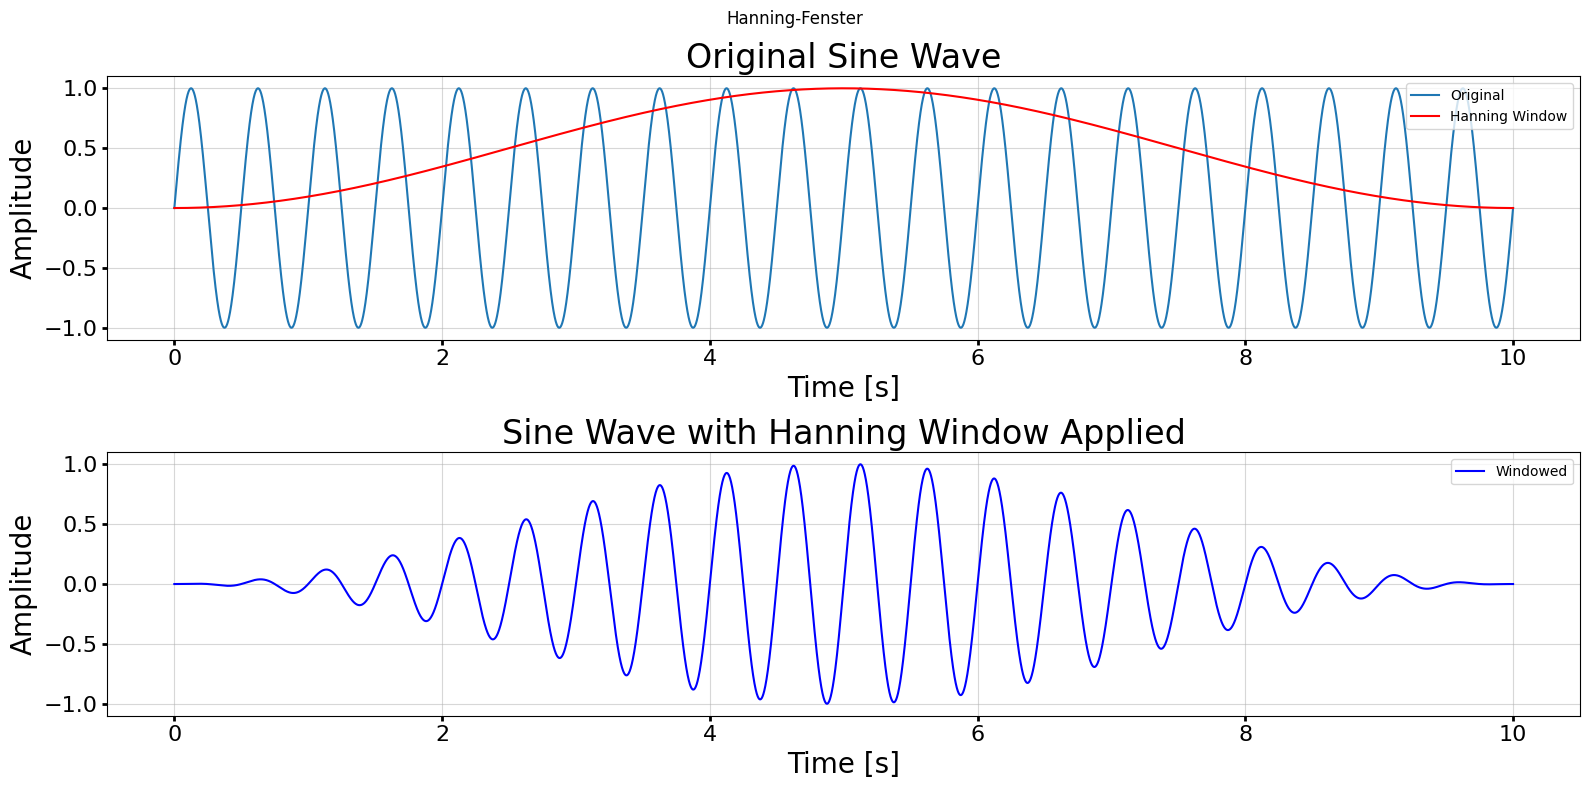

In [87]:
num_samples = 10000
duration = 10
frequency = 2  # Beispiel-Frequenz (kann geändert werden)
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)
window = np.hanning(num_samples)
sine_wave_windowed = sine_wave * window

title = 'Hanning-Fenster'
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t, sine_wave, label='Original')
ax1.plot(t, window, label='Hanning Window', color='red')
ax1.set_title('Original Sine Wave')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(alpha=alpha)

ax2.plot(t, sine_wave_windowed, label='Windowed', color='blue')
ax2.set_title('Sine Wave with Hanning Window Applied')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.grid(alpha=alpha)

plt.tight_layout()
plt.suptitle('Hanning-Fenster')
plt.tight_layout()  # Adjust layout to include the main title
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

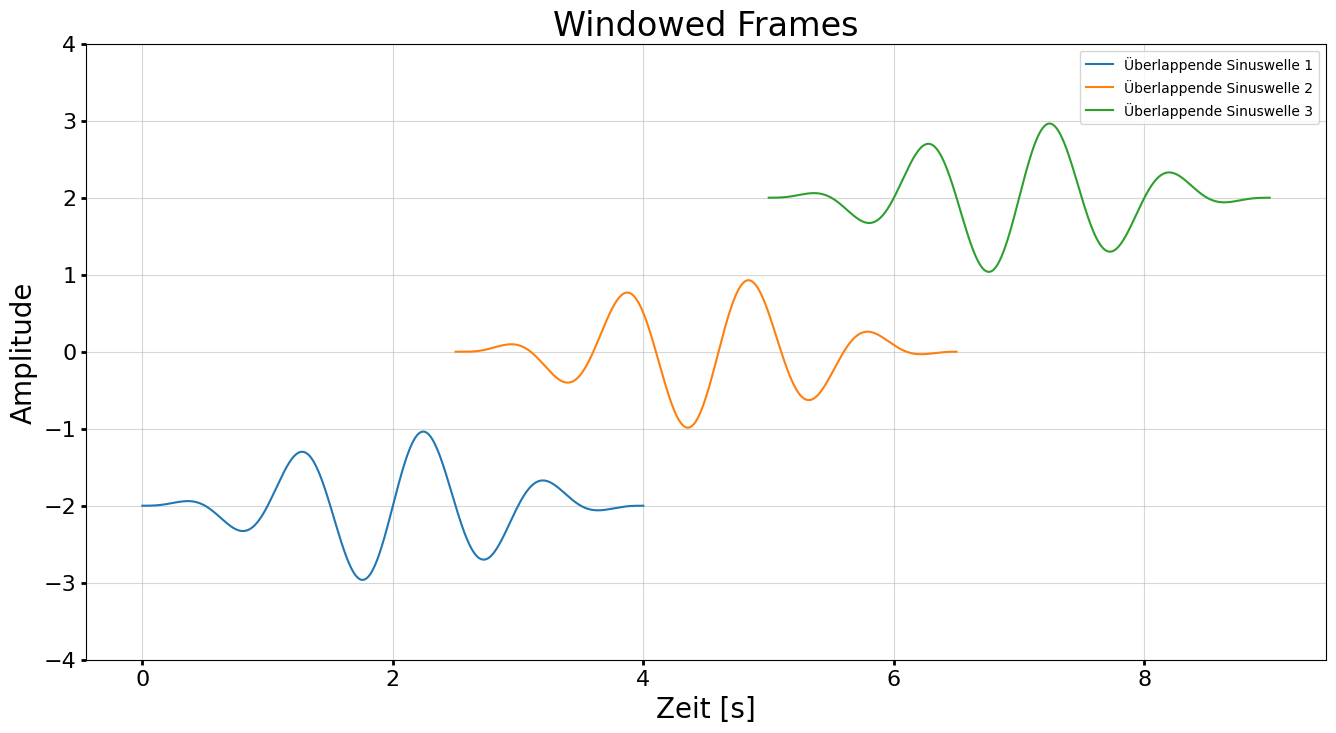

In [88]:
# Definieren der Parameter
num_samples = 10000
duration = 10
frequency = 1  # Beispiel-Frequenz (kann geändert werden)
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)

# Definieren der Fenstergröße und das Hanning-Fenster erstellen
window_size = 4000
window = signal.windows.hann(window_size)

# Anwenden des Hanning-Fensters auf jede Sinuswelle
sine1_windowed = sine_wave[0:window_size] * window
sine2_windowed = sine_wave[2900:2900+ window_size] * window
sine3_windowed = sine_wave[6000:6000 + window_size] * window



title = 'Windowed Frames'
# Plotten der überlappenden Sinuswellen
plt.plot(t[0:window_size], sine1_windowed - 2, label='Überlappende Sinuswelle 1')
plt.plot(t[2500:2500+window_size], sine2_windowed, label='Überlappende Sinuswelle 2') 
plt.plot(t[5000:5000+window_size], sine3_windowed + 2, label='Überlappende Sinuswelle 3')
plt.title(title)
plt.ylim(-4, 4)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png' , dpi=600, bbox_inches='tight', transparent=True)
plt.show()

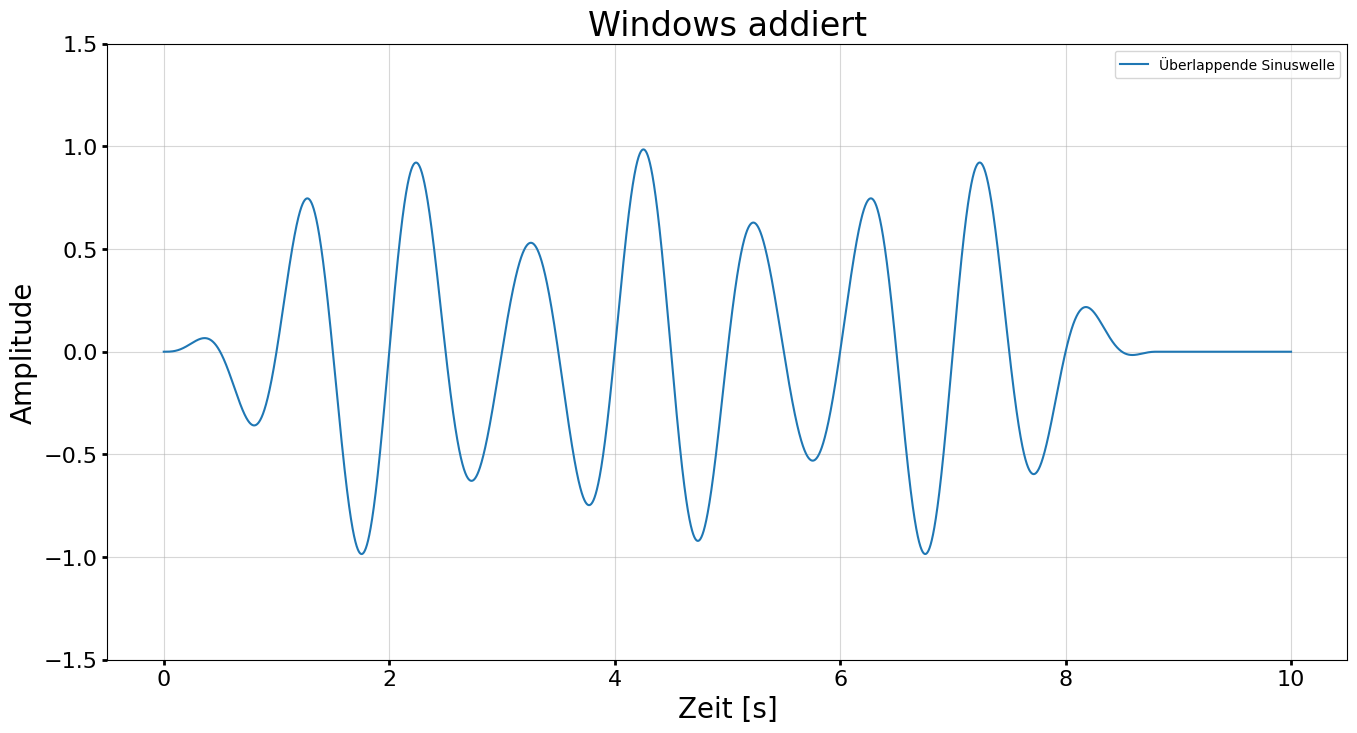

In [89]:
# Definieren der Parameter
# Parameters
num_samples = 10000
duration = 10
frequency = 1  # Example frequency (can be changed)
t = np.linspace(0, duration, num_samples)
sine_wave = np.sin(2 * np.pi * frequency * t)

# Define window size and create the Hanning window
window_size = 3800
window = signal.windows.hann(window_size)

# Apply the Hanning window to different sections of the sine wave
sine1_windowed = sine_wave[0:window_size] * window
sine2_windowed = sine_wave[2500:2500 + window_size] * window
sine3_windowed = sine_wave[5000:5000 + window_size] * window

# Initialize the composite wave
composite_wave = np.zeros(num_samples)
composite_wave[0:window_size] += sine1_windowed
composite_wave[2500:2500 + window_size] += sine2_windowed
composite_wave[5000:5000 + window_size] += sine3_windowed



title = 'Windows addiert'
# Plot the composite wave
plt.plot(t, composite_wave, label='Überlappende Sinuswelle')

plt.title(title)
plt.ylim(-1.5, 1.5)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=alpha)
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Phase Vocoder

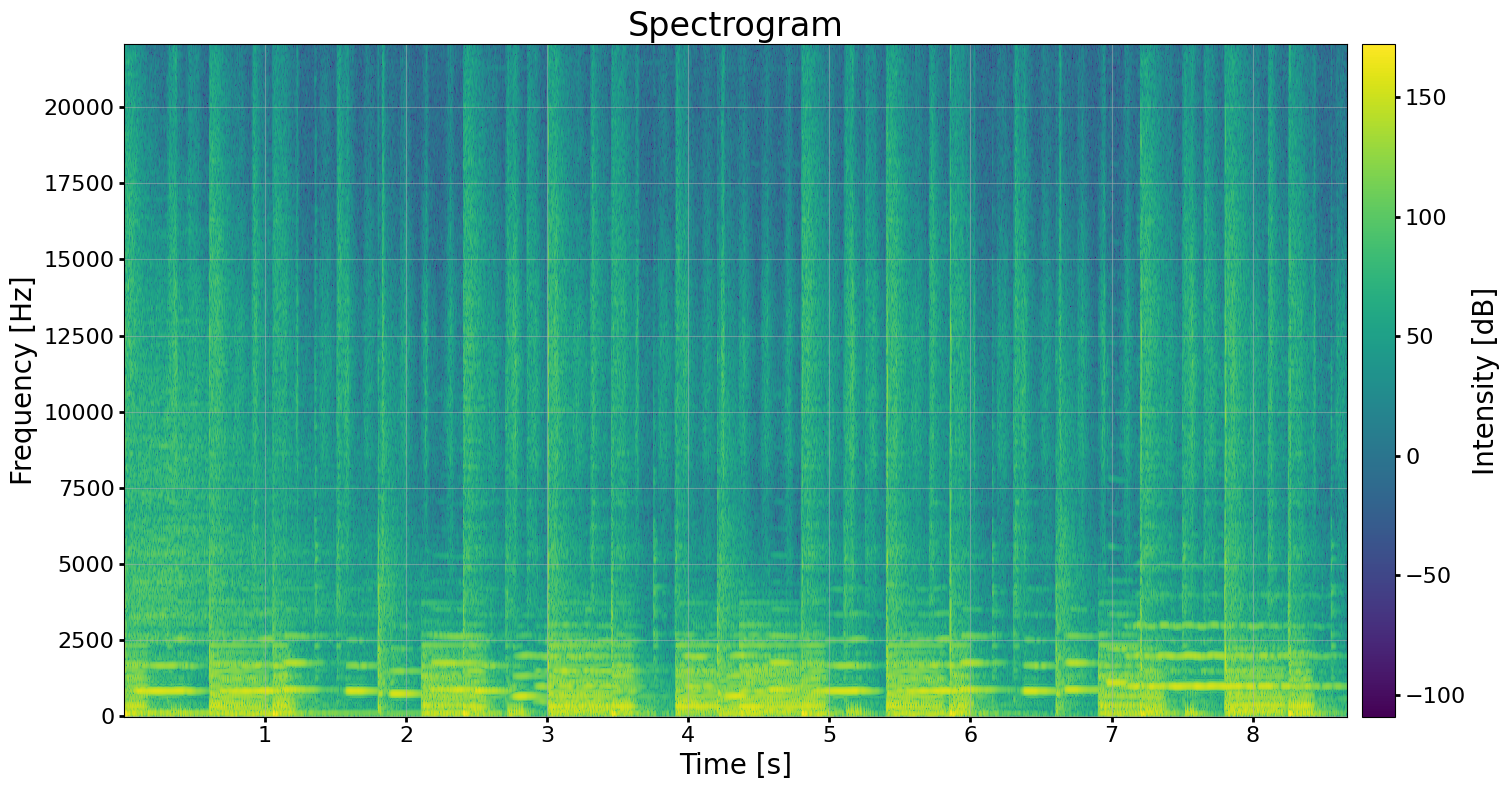

In [90]:
fs_r, data_r = wf.read("../data/sunny-original.wav")

# If stereo, take one channel
if len(data_r.shape) > 1:
    data_r = data_r[:, 0]

# Parameters for the spectrogram
nfft = 2048  # Length of each FFT segment
nperseg = 512  # Length of each segment
noverlap = 256  # Overlap between segments

# Compute the spectrogram
f, t_spec, Sxx = signal.spectrogram(data_r, fs=fs_r, window='hann', nfft=nfft, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')

# Plot the spectrogram
plt.pcolormesh(t_spec, f, 20 * np.log10(Sxx))
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]', pad=0.01)
plt.tight_layout()
plt.grid(alpha=alpha)
plt.savefig(path + 'spectrogram.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


# perfect reconstruction

In [102]:
fs_r, original = wf.read("../data/sunny-original.wav")
fs_r, ola = wf.read("../data/pr_ola.wav")
fs_r, pv = wf.read("../data/pr_pv.wav")
original = original[:, 0]

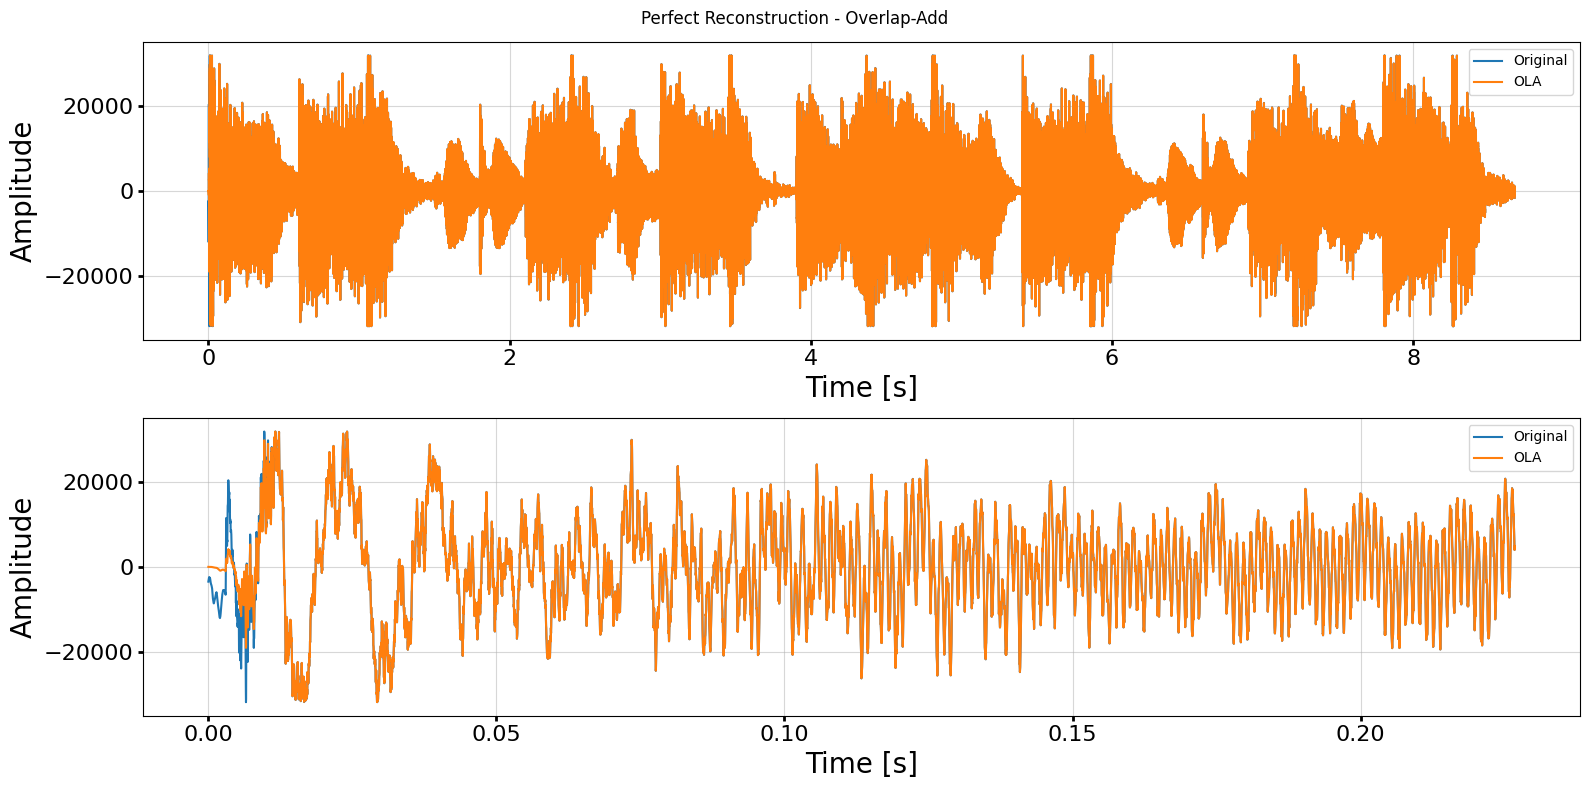

In [105]:
start = 0  
end = 10000

time = np.linspace(0, len(original) / fs_r, num=len(original))

title = 'Perfect Reconstruction - Overlap-Add'
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, original, label='Original')
ax1.plot(time, ola[0:len(original)], label='OLA')
ax1.set_title('')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(alpha=alpha)

ax2.plot(time[start:end], original[start:end], label='Original')
ax2.plot(time[start:end], ola[start:end], label='OLA')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.grid(alpha=alpha)

fig.suptitle(title)
fig.tight_layout()  # Adjust layout to include the main title
fig.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

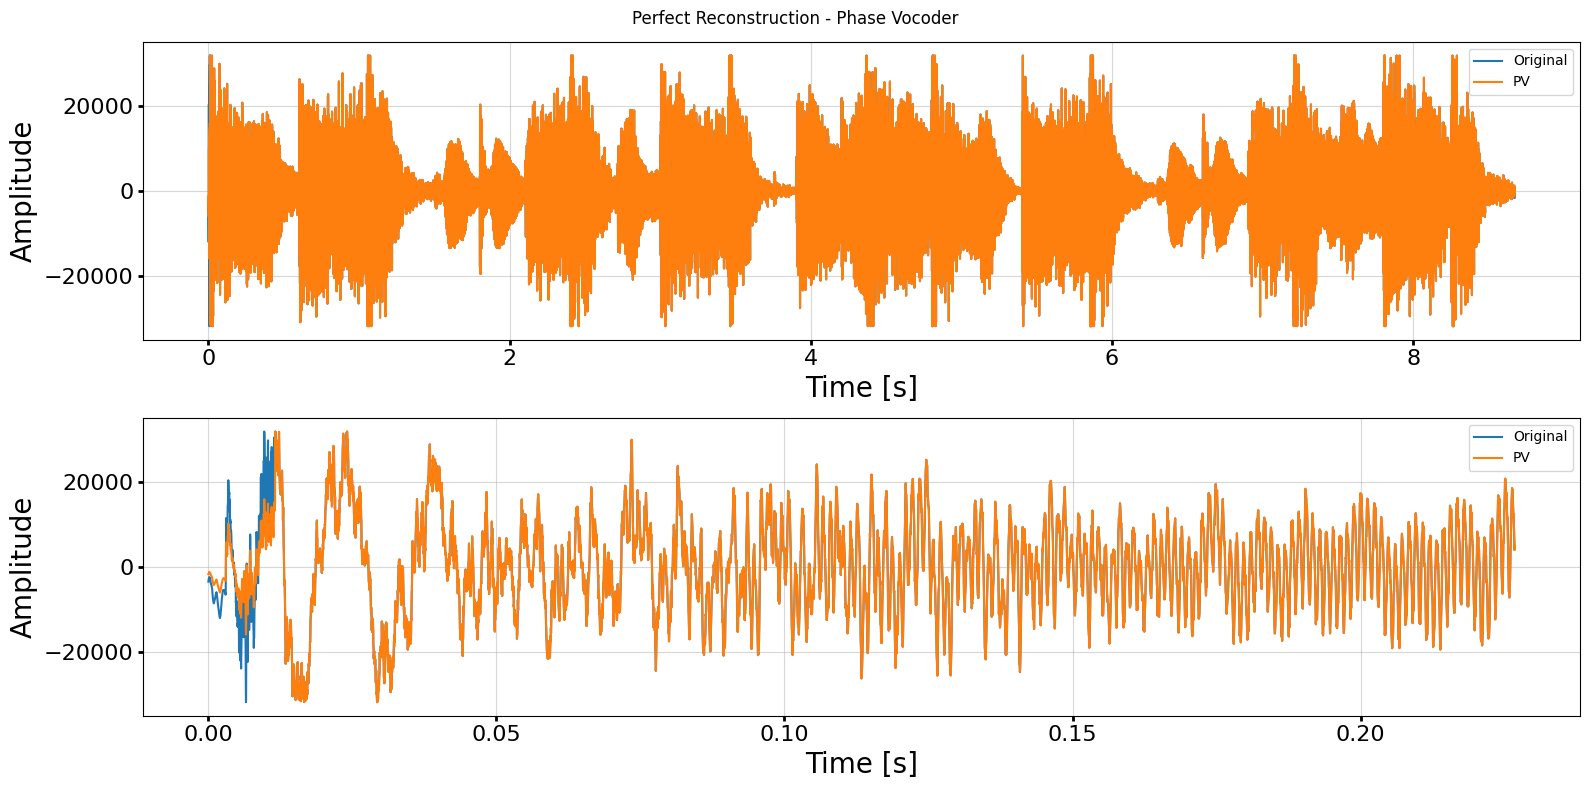

In [106]:
start = 0  
end = 10000

time = np.linspace(0, len(original) / fs_r, num=len(original))

title = 'Perfect Reconstruction - Phase Vocoder'
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, original, label='Original')
ax1.plot(time, pv[0:len(original)], label='PV')
ax1.set_title('')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(alpha=alpha)

ax2.plot(time[start:end], original[start:end], label='Original')
ax2.plot(time[start:end], pv[start:end], label='PV')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.grid(alpha=alpha)

fig.suptitle(title)
fig.tight_layout()  # Adjust layout to include the main title
fig.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [94]:
fs_r, original = wf.read("../data/dup.wav")
fs_r, ola = wf.read("../data/dup-ola.wav")
fs_r, pv = wf.read("../data/dup-pv.wav")
original = original[:, 0]

/tmp/ipykernel_7816/361136405.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_r, original = wf.read("../data/dup.wav")


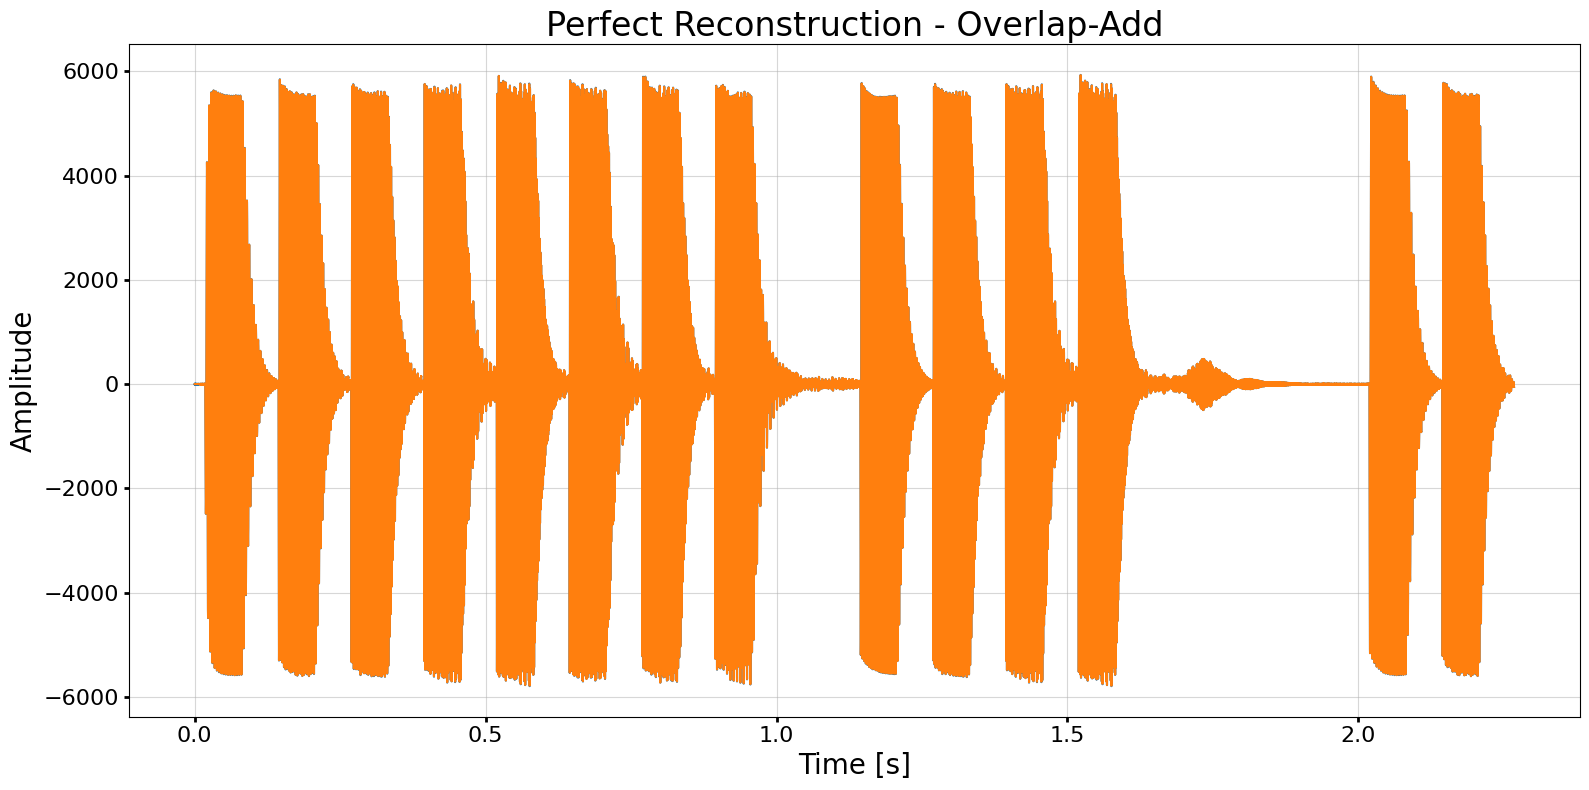

In [95]:
start = 0  
end = 100000

time = np.linspace(0, len(original) / fs_r, num=len(original))

plt.plot(time[start:end], original[start:end])
plt.plot(time[start:end], ola[start:end])
title = 'Perfect Reconstruction - Overlap-Add'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
#plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

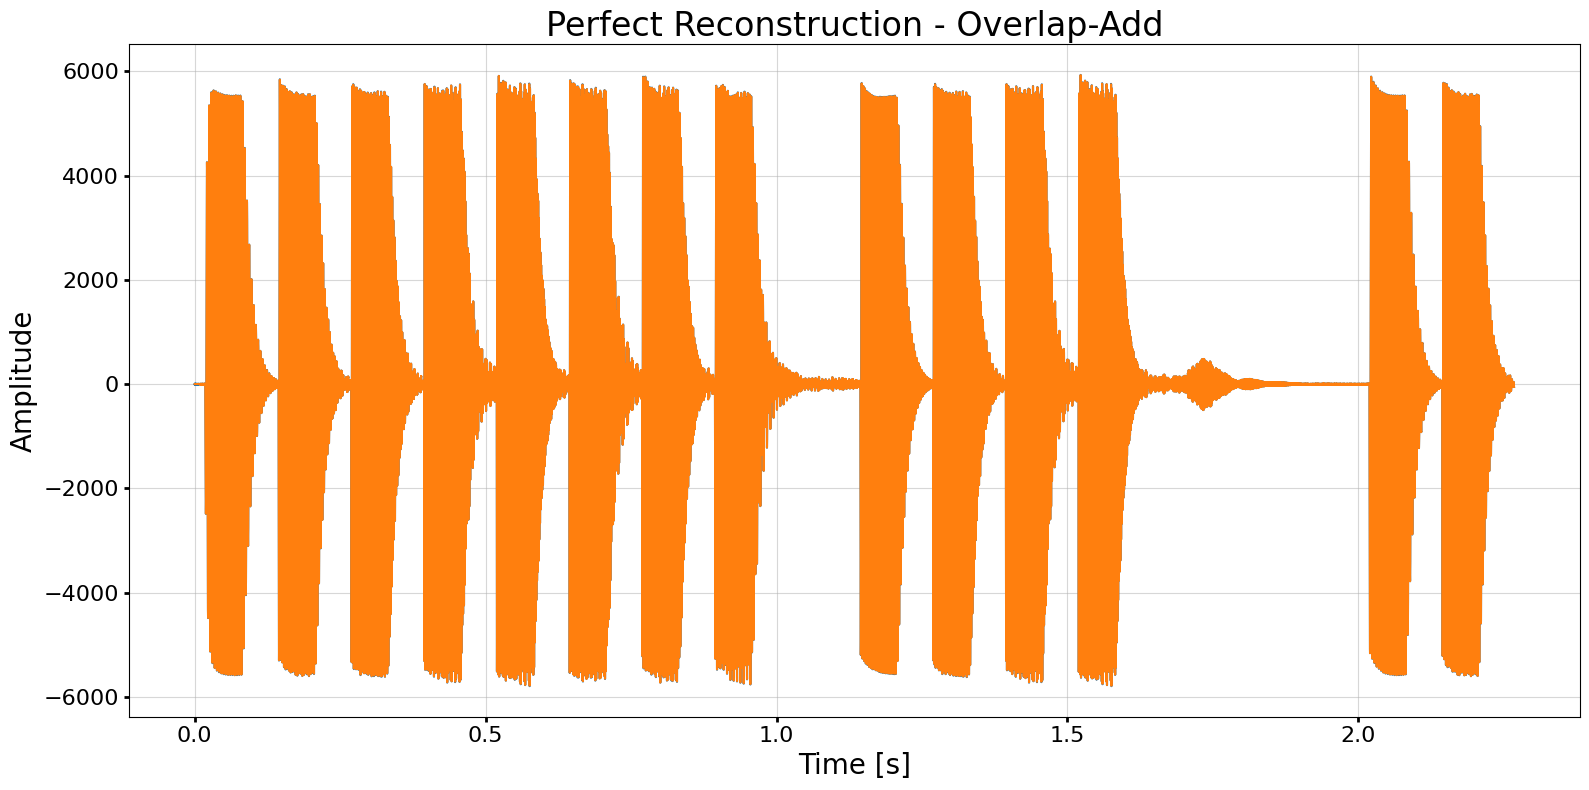

In [96]:
start = 0  
end = 100000

time = np.linspace(0, len(original) / fs_r, num=len(original))

plt.plot(time[start:end], original[start:end])
plt.plot(time[start:end], ola[start:end])
title = 'Perfect Reconstruction - Overlap-Add'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
#plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Analyse

In [97]:
fs_r, data_ola05 = wf.read("../data/sineWave-ola-05.wav")
fs_r, data_pv05 = wf.read("../data/sineWave-pv-05.wav")

fs_r, data_ola15 = wf.read("../data/sineWave-ola-15.wav")
fs_r, data_pv15 = wf.read("../data/sineWave-pv-15.wav")



start = 1000
end = 3500

## gestreckt

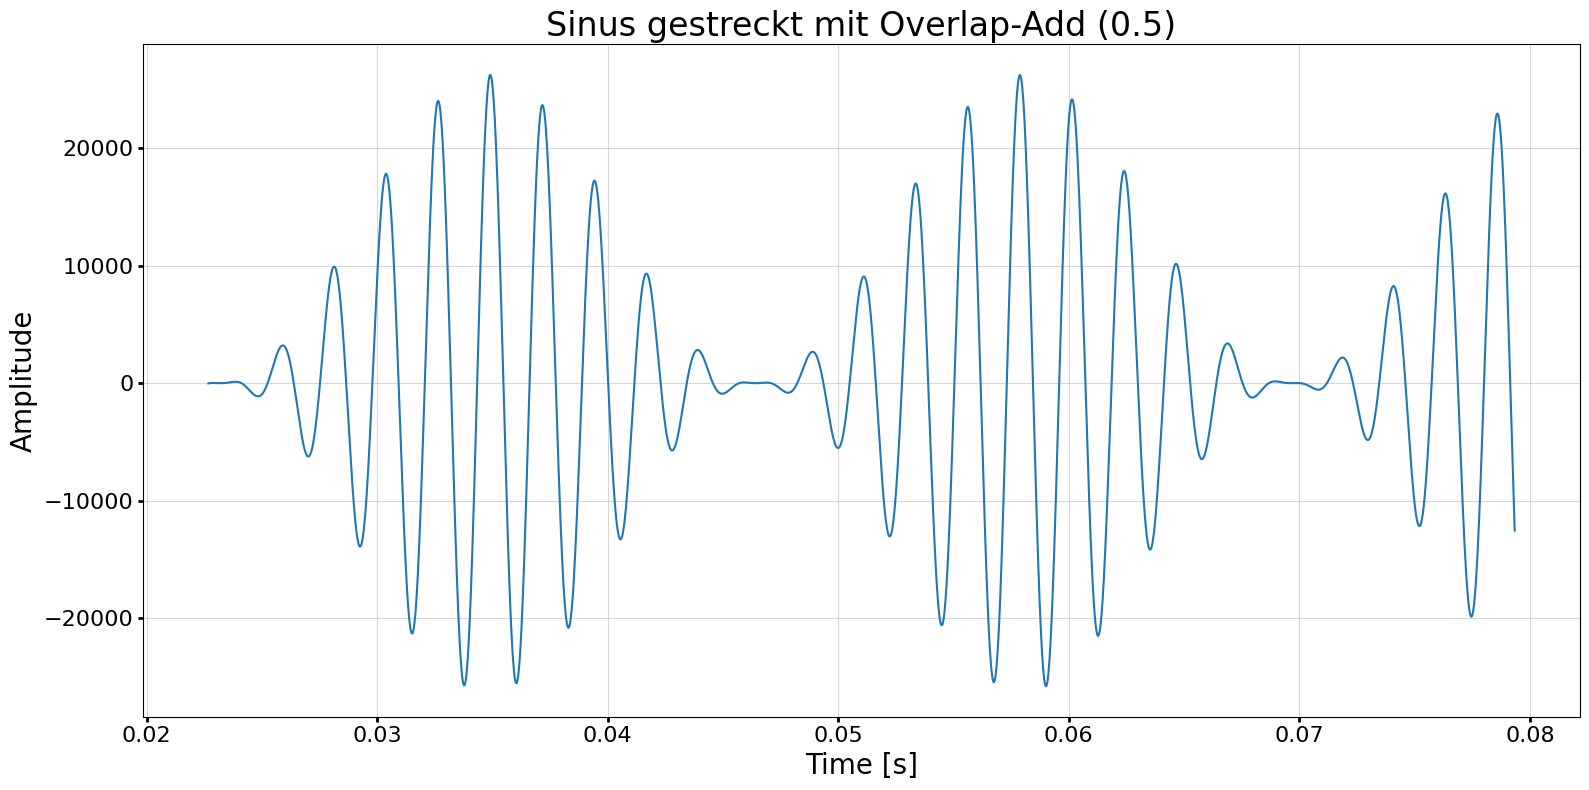

In [98]:

time = np.linspace(0, len(data_ola05) / fs_r, num=len(data_ola05))
plt.plot(time[start:end], data_ola05[start:end])
title = 'Sinus gestreckt mit Overlap-Add (0.5)'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

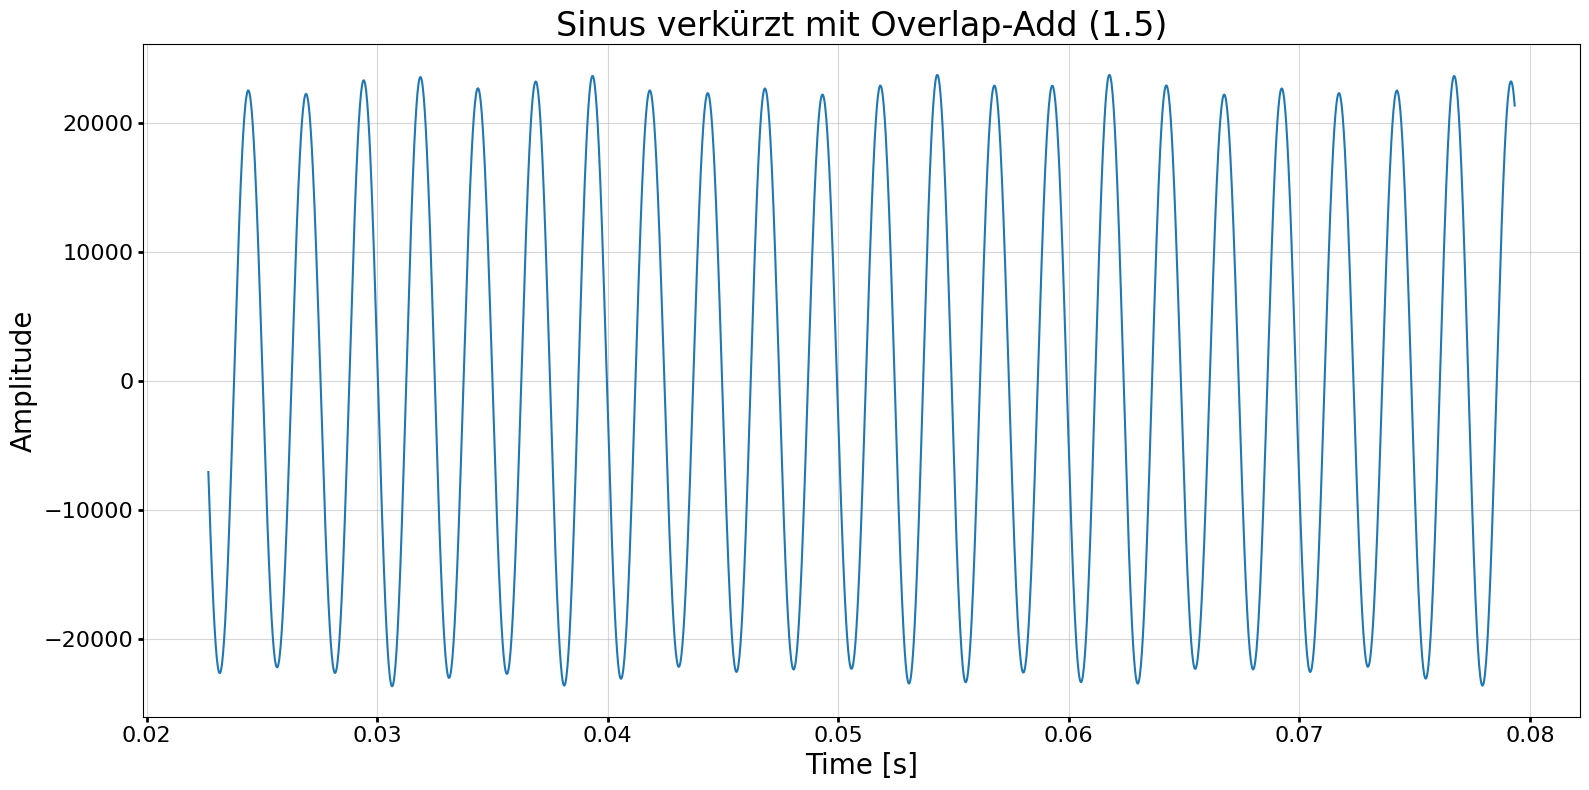

In [99]:
time = np.linspace(0, len(data_ola15) / fs_r, num=len(data_ola15))
plt.plot(time[start:end], data_ola15[start:end])

title = 'Sinus verkürzt mit Overlap-Add (1.5)'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

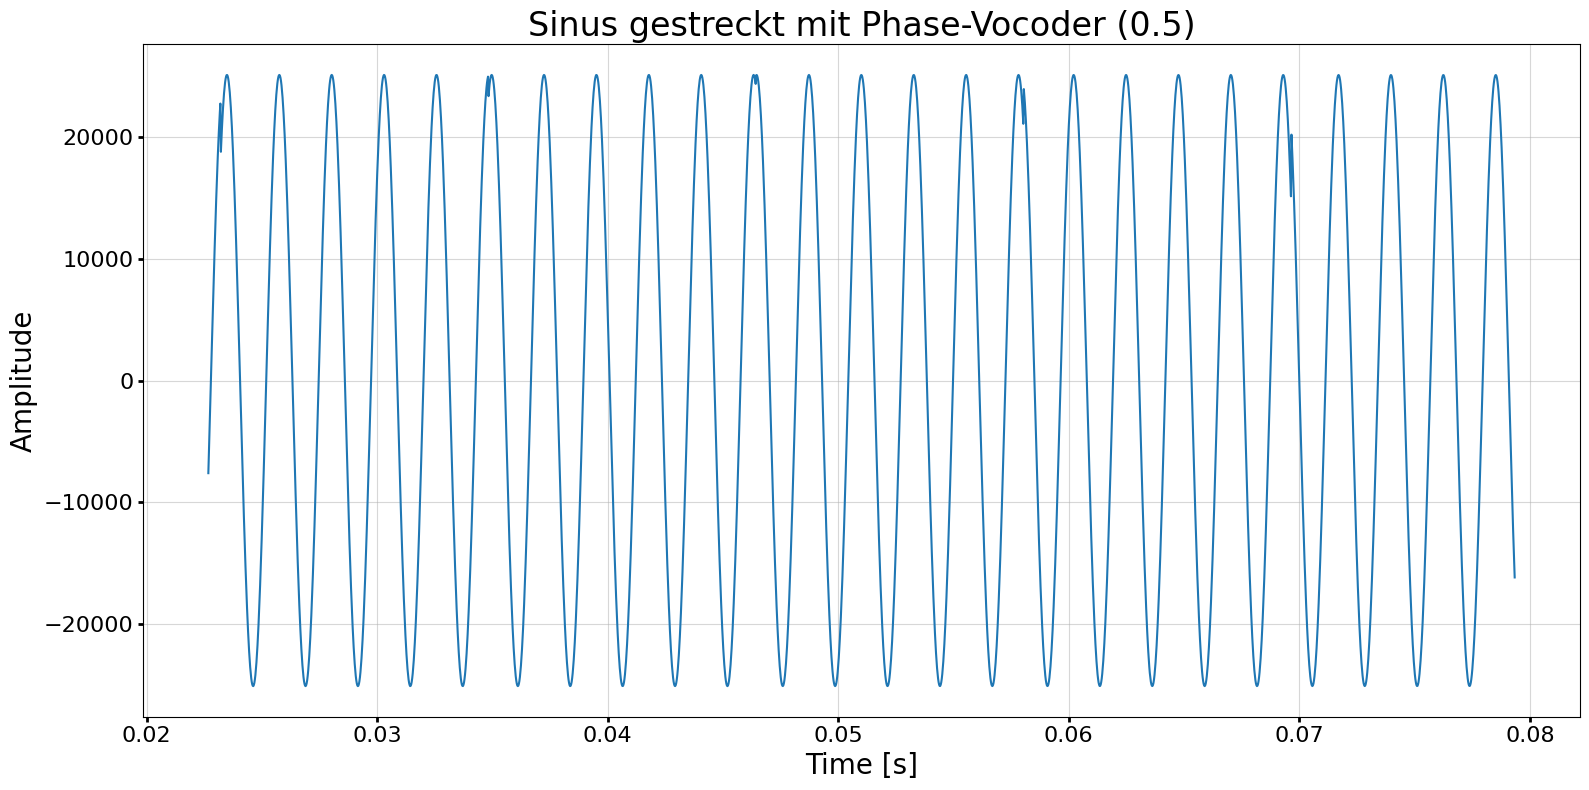

In [100]:
time = np.linspace(0, len(data_pv05) / fs_r, num=len(data_pv05))
plt.plot(time[start:end], data_pv05[start:end])

title = 'Sinus gestreckt mit Phase-Vocoder (0.5)'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

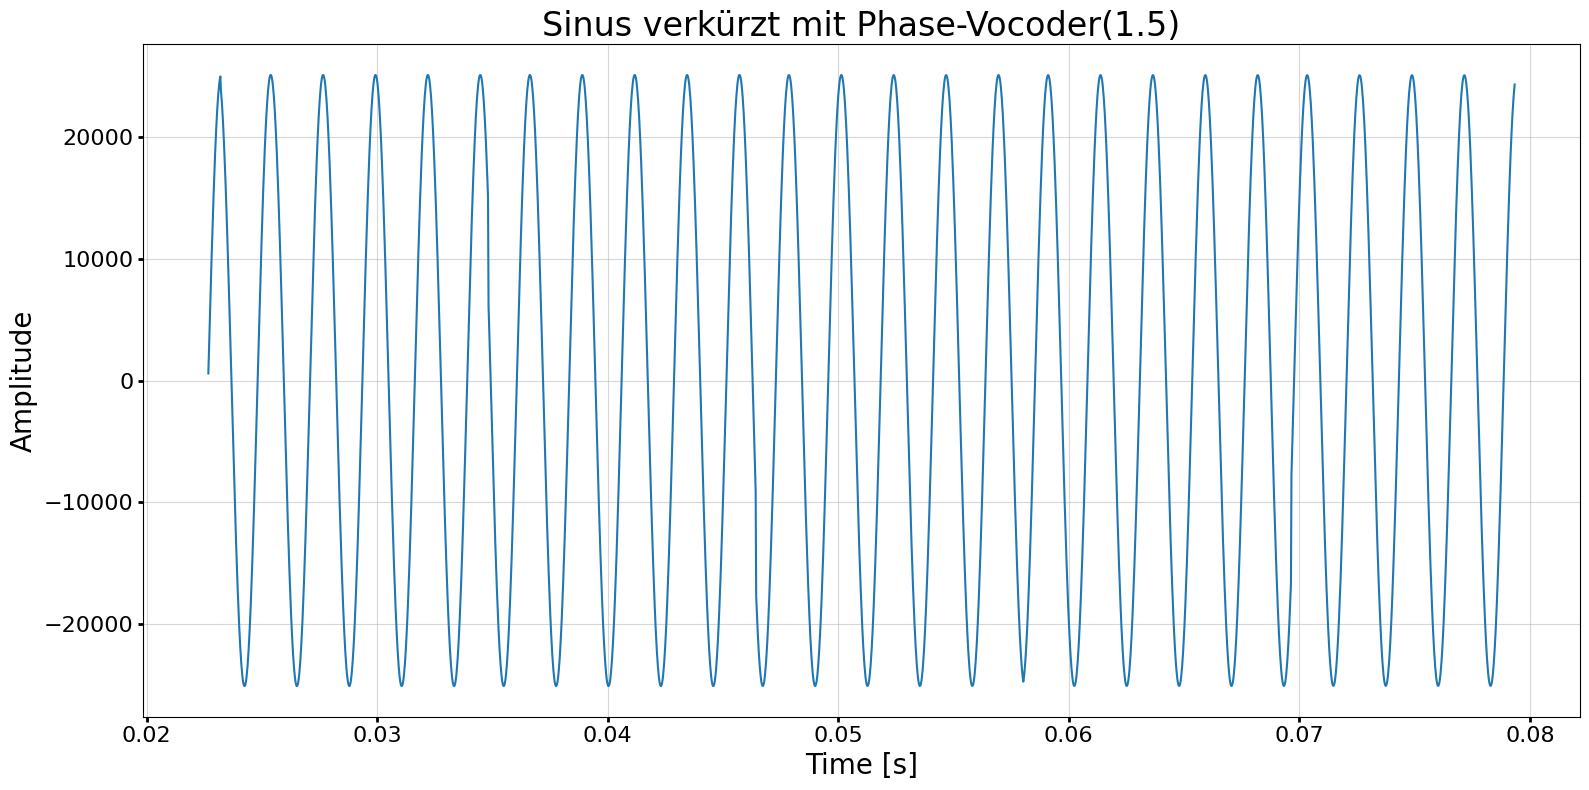

In [101]:
time = np.linspace(0, len(data_pv15) / fs_r, num=len(data_pv15))
plt.plot(time[start:end], data_pv15[start:end])
title = 'Sinus verkürzt mit Phase-Vocoder(1.5)'
plt.title(title)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(alpha=alpha)
plt.tight_layout()
plt.savefig(path + title + '.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()